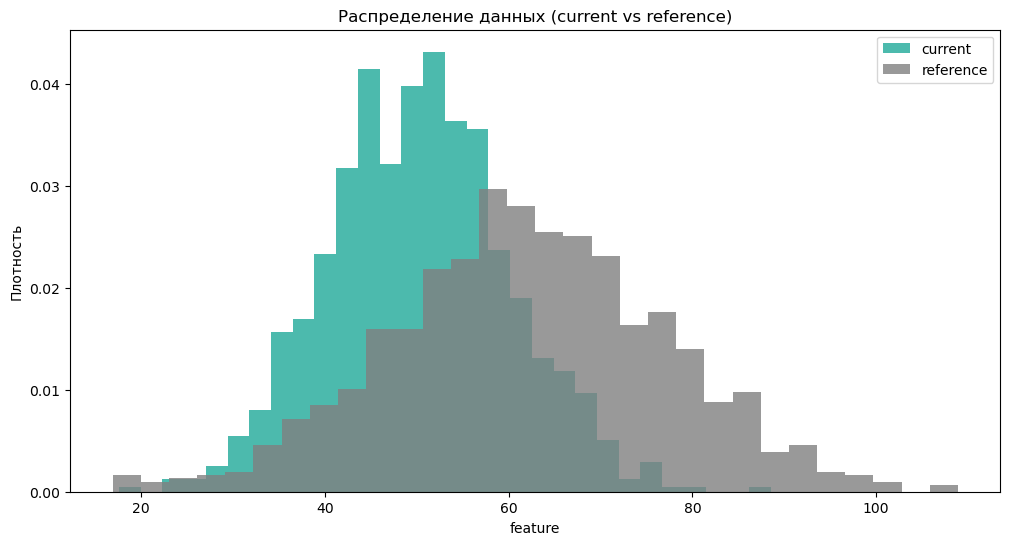

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

np.random.seed(42)
сurrent= pd.DataFrame({'feature': np.random.normal(loc=50, scale=10, size=1000),})
reference = pd.DataFrame({'feature': np.random.normal(loc=61, scale=15, size=1000)})

def visualize_drift(сurrent, reference, feature_name, num_bins=30):
    """
    Визуализирует распределение признака для обучающего и тестового наборов данных,
    а также выполняет тест Колмогорова-Смирнова для оценки дрифта.
    """

    plt.figure(figsize=(12, 6))

    # Гистограммы
    plt.hist(сurrent[feature_name], bins=num_bins, alpha=0.8, label='сurrent', density=True, color='#1fa999')
    plt.hist(reference[feature_name], bins=num_bins, alpha=0.8, label='reference', density=True, color='grey')

    # Название и легенда
    plt.xlabel(feature_name)
    plt.ylabel('Плотность')
    plt.title(f'Распределение данных (сurrent vs reference)')
    plt.legend(loc='upper right')

    # Тест Колмогорова-Смирнова (K-S тест)
    ks_statistic, p_value = stats.ks_2samp(сurrent[feature_name], reference[feature_name])
    # print('Тест Колмогорова-Смирнова')
    # print(f'K-S Statistic: {ks_statistic:.3f}\nP-value: {p_value:.3f}')

    plt.show()

visualize_drift(сurrent, reference, 'feature')

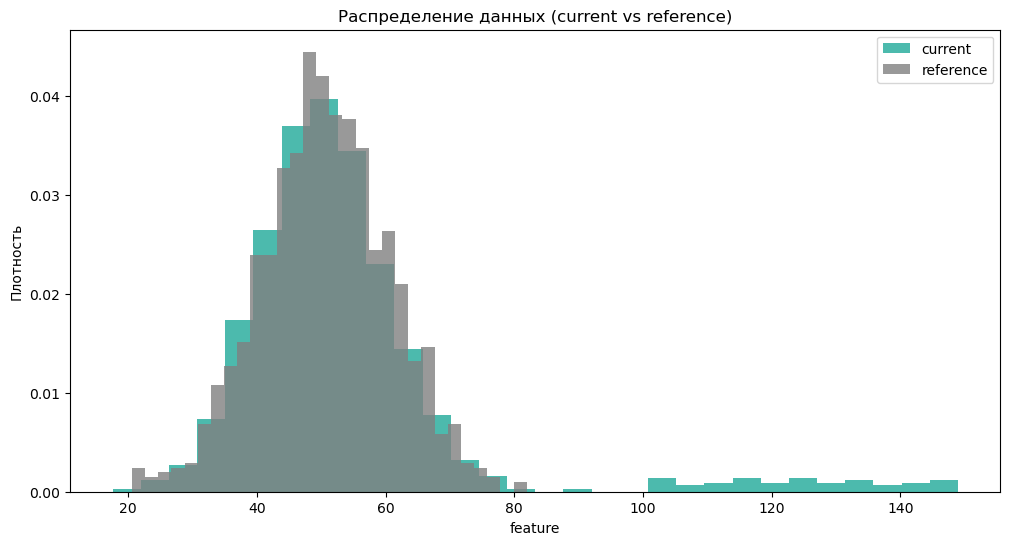

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

np.random.seed(42)
сurrent= pd.DataFrame({'feature': np.random.normal(loc=50, scale=10, size=1000)})
reference = pd.DataFrame({'feature': np.random.normal(loc=50, scale=10, size=1000)})

# Добавляем выбросы в 'сurrent'
num_outliers = 50  # Количество выбросов
outlier_values = np.random.uniform(low=100, high=150, size=num_outliers) #Генерируем случайные значения для выбросов

# Заменяем случайные элементы в 'сurrent' на выбросы
indices_to_replace = np.random.choice(сurrent.index, size=num_outliers, replace=False) #выбираем случайные индексы
сurrent.loc[indices_to_replace, 'feature'] = outlier_values # заменяем значения по выбранным индексам на значения выбросов


def visualize_drift(сurrent, reference, feature_name, num_bins=30):
    """
    Визуализирует распределение признака для обучающего и тестового наборов данных,
    а также выполняет тест Колмогорова-Смирнова для оценки дрифта.
    """

    plt.figure(figsize=(12, 6))

    # Гистограммы
    plt.hist(сurrent[feature_name], bins=num_bins, alpha=0.8, label='сurrent', density=True, color='#1fa999')
    plt.hist(reference[feature_name], bins=num_bins, alpha=0.8, label='reference', density=True, color='grey')

    # Название и легенда
    plt.xlabel(feature_name)
    plt.ylabel('Плотность')
    plt.title(f'Распределение данных (сurrent vs reference)')
    plt.legend(loc='upper right')

    # Тест Колмогорова-Смирнова (K-S тест)
    ks_statistic, p_value = stats.ks_2samp(сurrent[feature_name], reference[feature_name])
    # print('Тест Колмогорова-Смирнова')
    # print(f'K-S Statistic: {ks_statistic:.3f}\nP-value: {p_value:.3f}')

    plt.show()

visualize_drift(сurrent, reference, 'feature')

In [28]:
import pandas as pd
import numpy as np

np.random.seed(42)
сurrent= pd.DataFrame({'deposit': np.random.normal(loc=50, scale=10, size=10).round(2)})
reference = pd.DataFrame({'deposit': np.random.normal(loc=50, scale=10, size=10).round(2)})

reference

,deposit
0,45.37
1,45.34
2,52.42
3,30.87
4,32.75
5,44.38
6,39.87
7,53.14
8,40.92
9,35.88


In [37]:
сurrent.iloc[0] = -1000
сurrent.iloc[4] = float('inf')
сurrent.iloc[5] = -float('inf')
сurrent.iloc[7] = 'two hundred'
сurrent.iloc[9] = np.nan
сurrent

,deposit
0,-1000
1,48.62
2,56.48
3,65.23
4,inf
5,-inf
6,65.79
7,two hundred
8,45.31
9,NaN
